In [341]:
from PIL import Image
from io import BytesIO
from IPython.display import display
import numpy as np
import random
import segno
from segno import helpers
from PIL import ImageDraw
from PIL import ImageFont


In [342]:

def binarize(image_to_transform, threshold):

    output_image=image_to_transform.convert("L")

    for x in range(output_image.width):
        for y in range(output_image.height):
            # for the given pixel at w,h, lets check its value against the threshold
            if output_image.getpixel((x,y))< threshold: #note that the first parameter is actually a tuple object
                # lets set this to zero
                if  (random.randint(0, 9)) > 4 : 
                    output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )

    #now we just     return the new image
    return output_image

def BACKGROUND2(img, width, height, threshold, binary_string):
    output_image = img.copy()  # Create a copy of the original image
    total_iterations = width * height
    weight = 1
    white_streak = 0  # Counter for consecutive white pixels
    for i in range(total_iterations):
        x = i % width
        y = i // width
        current_threshold = threshold * weight
        binary_index = i % len(binary_string)  # Get the corresponding index in the binary string

        # Get the current color of the pixel at (x, y)
        current_color = output_image.getpixel((x, y))

        # Calculate the intensity of the pixel
        intensity = sum(current_color)

        # print(x,y,intensity)

        if y ==height-1 :
            if binary_string[binary_index] == '1':
                output_image.putpixel((x, y), (255, 255, 255))
        else:
            if y % 2 == 0 and random.randint(0, 99) < current_threshold and binary_string[binary_index] == '1' and intensity > threshold:
                output_image.putpixel((x, y), (255, 255, 255))
            elif y % 5 == 0 and random.randint(0, 99) < current_threshold and binary_string[binary_index] == '1' and intensity > threshold:
                output_image.putpixel((x, y), (255, 255, 255))
            else :
                if (x+y)%2==0 and random.randint(0,10)<3:
                    output_image.putpixel((x, y), (18,18,18)) 
                else:
                    output_image.putpixel((x, y), (28,28,28))

        # Check for consecutive white pixels
        if intensity > threshold and binary_string[binary_index] == '1':
            white_streak += 1
            if white_streak > 4:
                output_image.putpixel((x, y), (28,28,28))
        else:
            white_streak = 0


    return output_image

In [343]:
# 2 -  Making the QR Code
vcard = segno.helpers.make_vcard(
                                name='Dan Cabrol',
                                displayname='Dan Cabrol',
                                # email can be multiple values, seperated by commas or make ['xx@gsomeemail.com','xg@someother.com']
                                email=('cabroldan@gmail.com','dan@iaseo.app'),
                                url =[
                                'https://www.notion.so/Dan-Cabrol-eb8a5e666ea04185a3556ef568aa7606',
                                'https://iaseo.app',
                                ],
                                phone='+33645895714',
                                )

qrcode = vcard.save('qr_code.png', scale=2, light=(18, 18, 18), dark="white")

### Making Front Side 

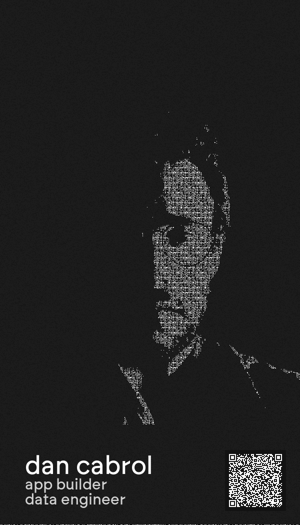

In [344]:
DIMENSION = [600,1050]

# 1 - import back image

img= Image.open("./moi_2_600.png")
width, height = img.size
black_bg = Image.new('RGB', size=(DIMENSION[0],DIMENSION[1]))
offset =  (0,DIMENSION[1]-height-200)
black_bg.paste(img,offset)

# 2 - binarize myself
myself = binarize(black_bg, 90).convert("RGBA")

threshold = 500
binary_string = '010001000110000101101110001000000100001101100001011000100111001001101111011011000010110000100000011001100110000101110100011010000110010101110010001011000010000001101000011101010111001101100010011000010110111001100100001011000010000001100100011011110010110101100101011100100010111000001010010000110110111101101110011001110111001001100001011101000111001100100000011101000110111100100000011001010111011001100101011100100111100101101111011011100110010100100000011100100110010101100001011001000110100101101110011001110010000001110100011010000110100101110011'
width = DIMENSION[0]
height = DIMENSION[1]
pixel_overlay = BACKGROUND2(myself,width, height, threshold, binary_string)

qrcode = Image.open('./qr_code.png')
offset =  (DIMENSION[0]-150,DIMENSION[1]-150)
pixel_overlay.paste(qrcode,offset)


# 5 - Write on front side
img = pixel_overlay.convert("RGBA")
I1 = ImageDraw.Draw(img)

font = ImageFont.truetype("Brockmann-Medium.otf", 50)
subfont = ImageFont.truetype("Brockmann-Medium.otf", 30)
minifont = ImageFont.truetype("Brockmann-Medium.otf", 12)
# Add Text to an image
I1.text((DIMENSION[0]//12,DIMENSION[1]-150), "dan cabrol", fill="white", font=font)
I1.text((DIMENSION[0]//12,DIMENSION[1]-100), "app builder", fill=(211,211,211), font=subfont)
I1.text((DIMENSION[0]//12,DIMENSION[1]-70), "data engineer", fill=(211,211,211), font=subfont)
# Display edited image
display(img.resize((DIMENSION[0]//2,DIMENSION[1]//2)))

img.save("final_frontside.png")


### Making BackSide

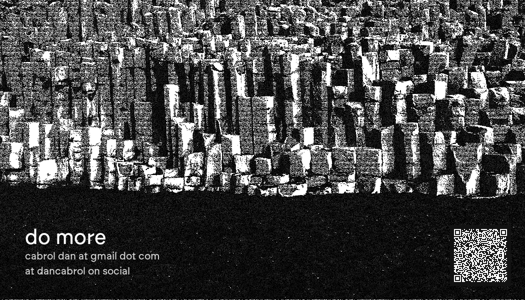

In [345]:
# 1 - Make the backside background

backbg = Image.open("./basalt.jpg").convert("RGBA").resize((DIMENSION[1],DIMENSION[0]))
pixel_overlay = BACKGROUND2(backbg,DIMENSION[1],DIMENSION[0], 500, binary_string).convert("RGBA")
pixel_overlay.putalpha(135)
backbg.putalpha(90)
backside = Image.alpha_composite(pixel_overlay, backbg)
backside= binarize(backside, 100).convert("RGBA")

qrcode = Image.open('./qr_code.png')
offset =  (DIMENSION[1]-150,DIMENSION[0]-150)
backside.paste(qrcode,offset)


# 3 - Write on backside

I1 = ImageDraw.Draw(backside)
font = ImageFont.truetype("Brockmann-Medium.otf", 40)
subfont = ImageFont.truetype("Brockmann-Medium.otf", 20)
minifont = ImageFont.truetype("Brockmann-Medium.otf", 12)

I1.text((50,DIMENSION[0]-150), "do more", fill="white", font=font)
I1.text((50,DIMENSION[0]-100), "cabrol dan at gmail dot com", fill=(211,211,211), font=subfont)
I1.text((50,DIMENSION[0]-70), "at dancabrol on social", fill=(211,211,211), font=subfont)

# Display edited image
display(backside.resize((DIMENSION[1]//2,DIMENSION[0]//2)))

backside.save("final_backside.png")
